In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import *
from mlxtend.plotting import plot_confusion_matrix

%matplotlib inline

In [16]:
df = pd.read_csv("/data/creditcard-fraud.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [18]:
df.Class.value_counts()/len(df)

0    0.998273
1    0.001727
Name: Class, dtype: float64

# Decision Tree 

Training
accuracy: 0.999348
precision: 0.853583
recall: 0.767507

Test
accuracy: 0.999204
precision: 0.786325
recall: 0.681481
CPU times: user 3.67 s, sys: 216 ms, total: 3.89 s
Wall time: 3.48 s


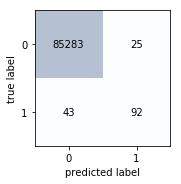

In [19]:
%%time 

target = "Class"
X = df.copy()
del X[target]
y = preprocessing.LabelEncoder().fit_transform(df[target])

# Convert the categorical features into one hot encoded values 
X_dummy = pd.get_dummies(X, drop_first=True)

# Split the data into training and test bucket
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X_dummy, y
        , test_size = 0.3, random_state = 1)

# Build a pipeline for data preparation and model building
pipe = pipeline.Pipeline([
    ("est", tree.DecisionTreeClassifier(max_depth=3))
])

# Perform training
pipe.fit(X_train, y_train)

# Make infereneces
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("Training\naccuracy: %f\nprecision: %f\nrecall: %f" % 
(metrics.accuracy_score(y_train, y_train_pred),
metrics.precision_score(y_train, y_train_pred), 
metrics.recall_score(y_train, y_train_pred)))

print("\nTest\naccuracy: %f\nprecision: %f\nrecall: %f" % 
(metrics.accuracy_score(y_test, y_test_pred),
metrics.precision_score(y_test, y_test_pred), 
metrics.recall_score(y_test, y_test_pred)))

plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

Text(0,0.5,'Accuracy scores')

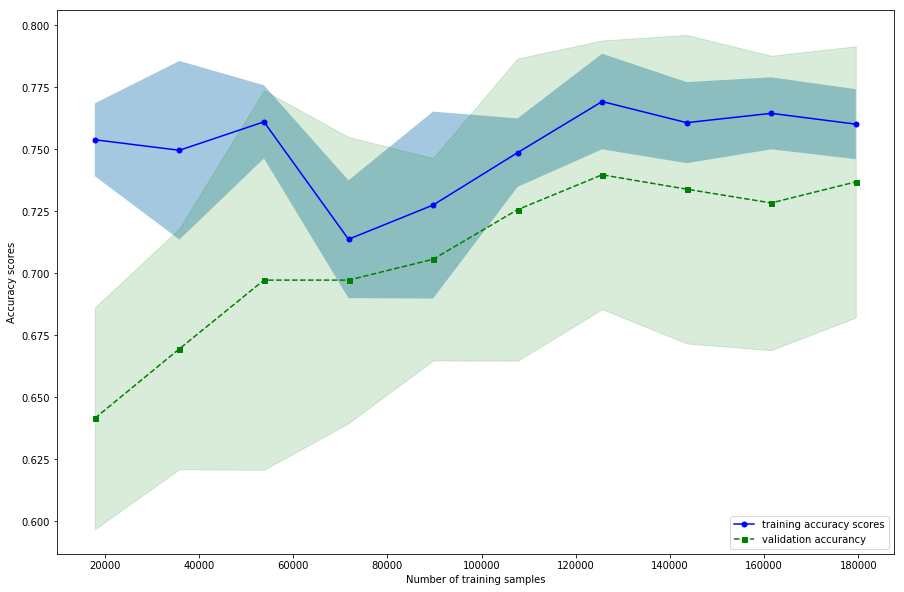

In [20]:
%%time 

train_sizes, train_scores, test_scores = model_selection.learning_curve(scoring = "recall",
                                                                        
                estimator = pipe, X = X_train, y = y_train,
                train_sizes = np.linspace(0.1, 1.0, 10),
                cv = 10)

train_mean = np.mean(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.figure(figsize = (15, 10))
plt.plot(train_sizes, train_mean, color = "b", marker = "o", markersize = 5, label = "training accuracy scores")
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.4)
plt.plot(train_sizes, test_mean, color = "g", ls = "--", marker = "s", markersize = 5, label = "validation accurancy")
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = "g")


plt.legend(loc = "lower right")
plt.xlabel("Number of training samples")
plt.ylabel("Recall scores")